In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
# fetch로 시작하는 라이브러리 -> 대용량 
# make으로 시작하는 라이브러리 -> 로직 증명
# load로 시작하는 라이브버리 -> 작은 데이터 load_iris (전부 소문자) => 함수 
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier # 지도학습 -> 분류 classification 선택 
np.random.seed(1) # 순서를 정해놓는다. 
np.random.randint(10) # 재연가능성을 정해놓는다. kernel 다시 껐다 켜도 똑같이 나온다. 
from sklearn.model_selection import train_test_split # 학습시킬 것과 테스트할 것을 분리시킴 
from sklearn.metrics import confusion_matrix
plt.rcParams['font.family'] = 'KoPubWorldBatang_Pro'

In [2]:
data = sns.load_dataset('iris')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# NaN 이 있으면 missingno 임포트 후 확인 

In [7]:
# EDA (문자 데이터 쓴다) vs 기계학습 (only number) 

In [8]:
# pandas, scikit 에서 문자를 숫자로 변환 가능 

In [11]:
data.describe(include='all') # 통계치 나옴 incldue='all' 추가하면 숫자 데이터 외에 문자 데이터까지 전부 다 나온다. 

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [12]:
data.describe(include=object) # 문자열 관련 데이터만 보기 

,species
count,150
unique,3
top,versicolor
freq,50


In [13]:
# seaborn에서 pairplot 써서 시각화 

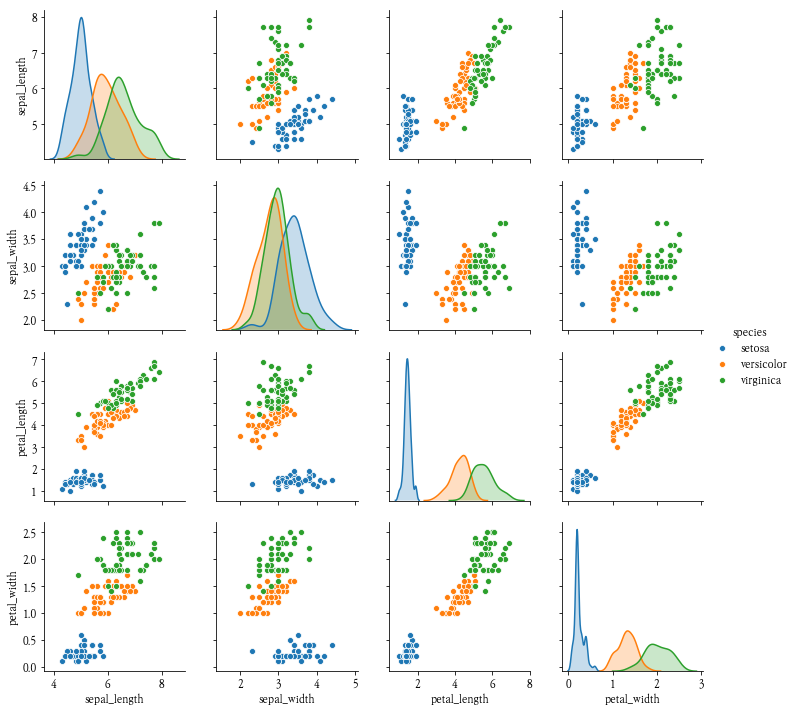

In [15]:
sns.pairplot(data,hue='species')

In [16]:
# 내가 원하는 것만 잘라서 볼 때는 facet grid

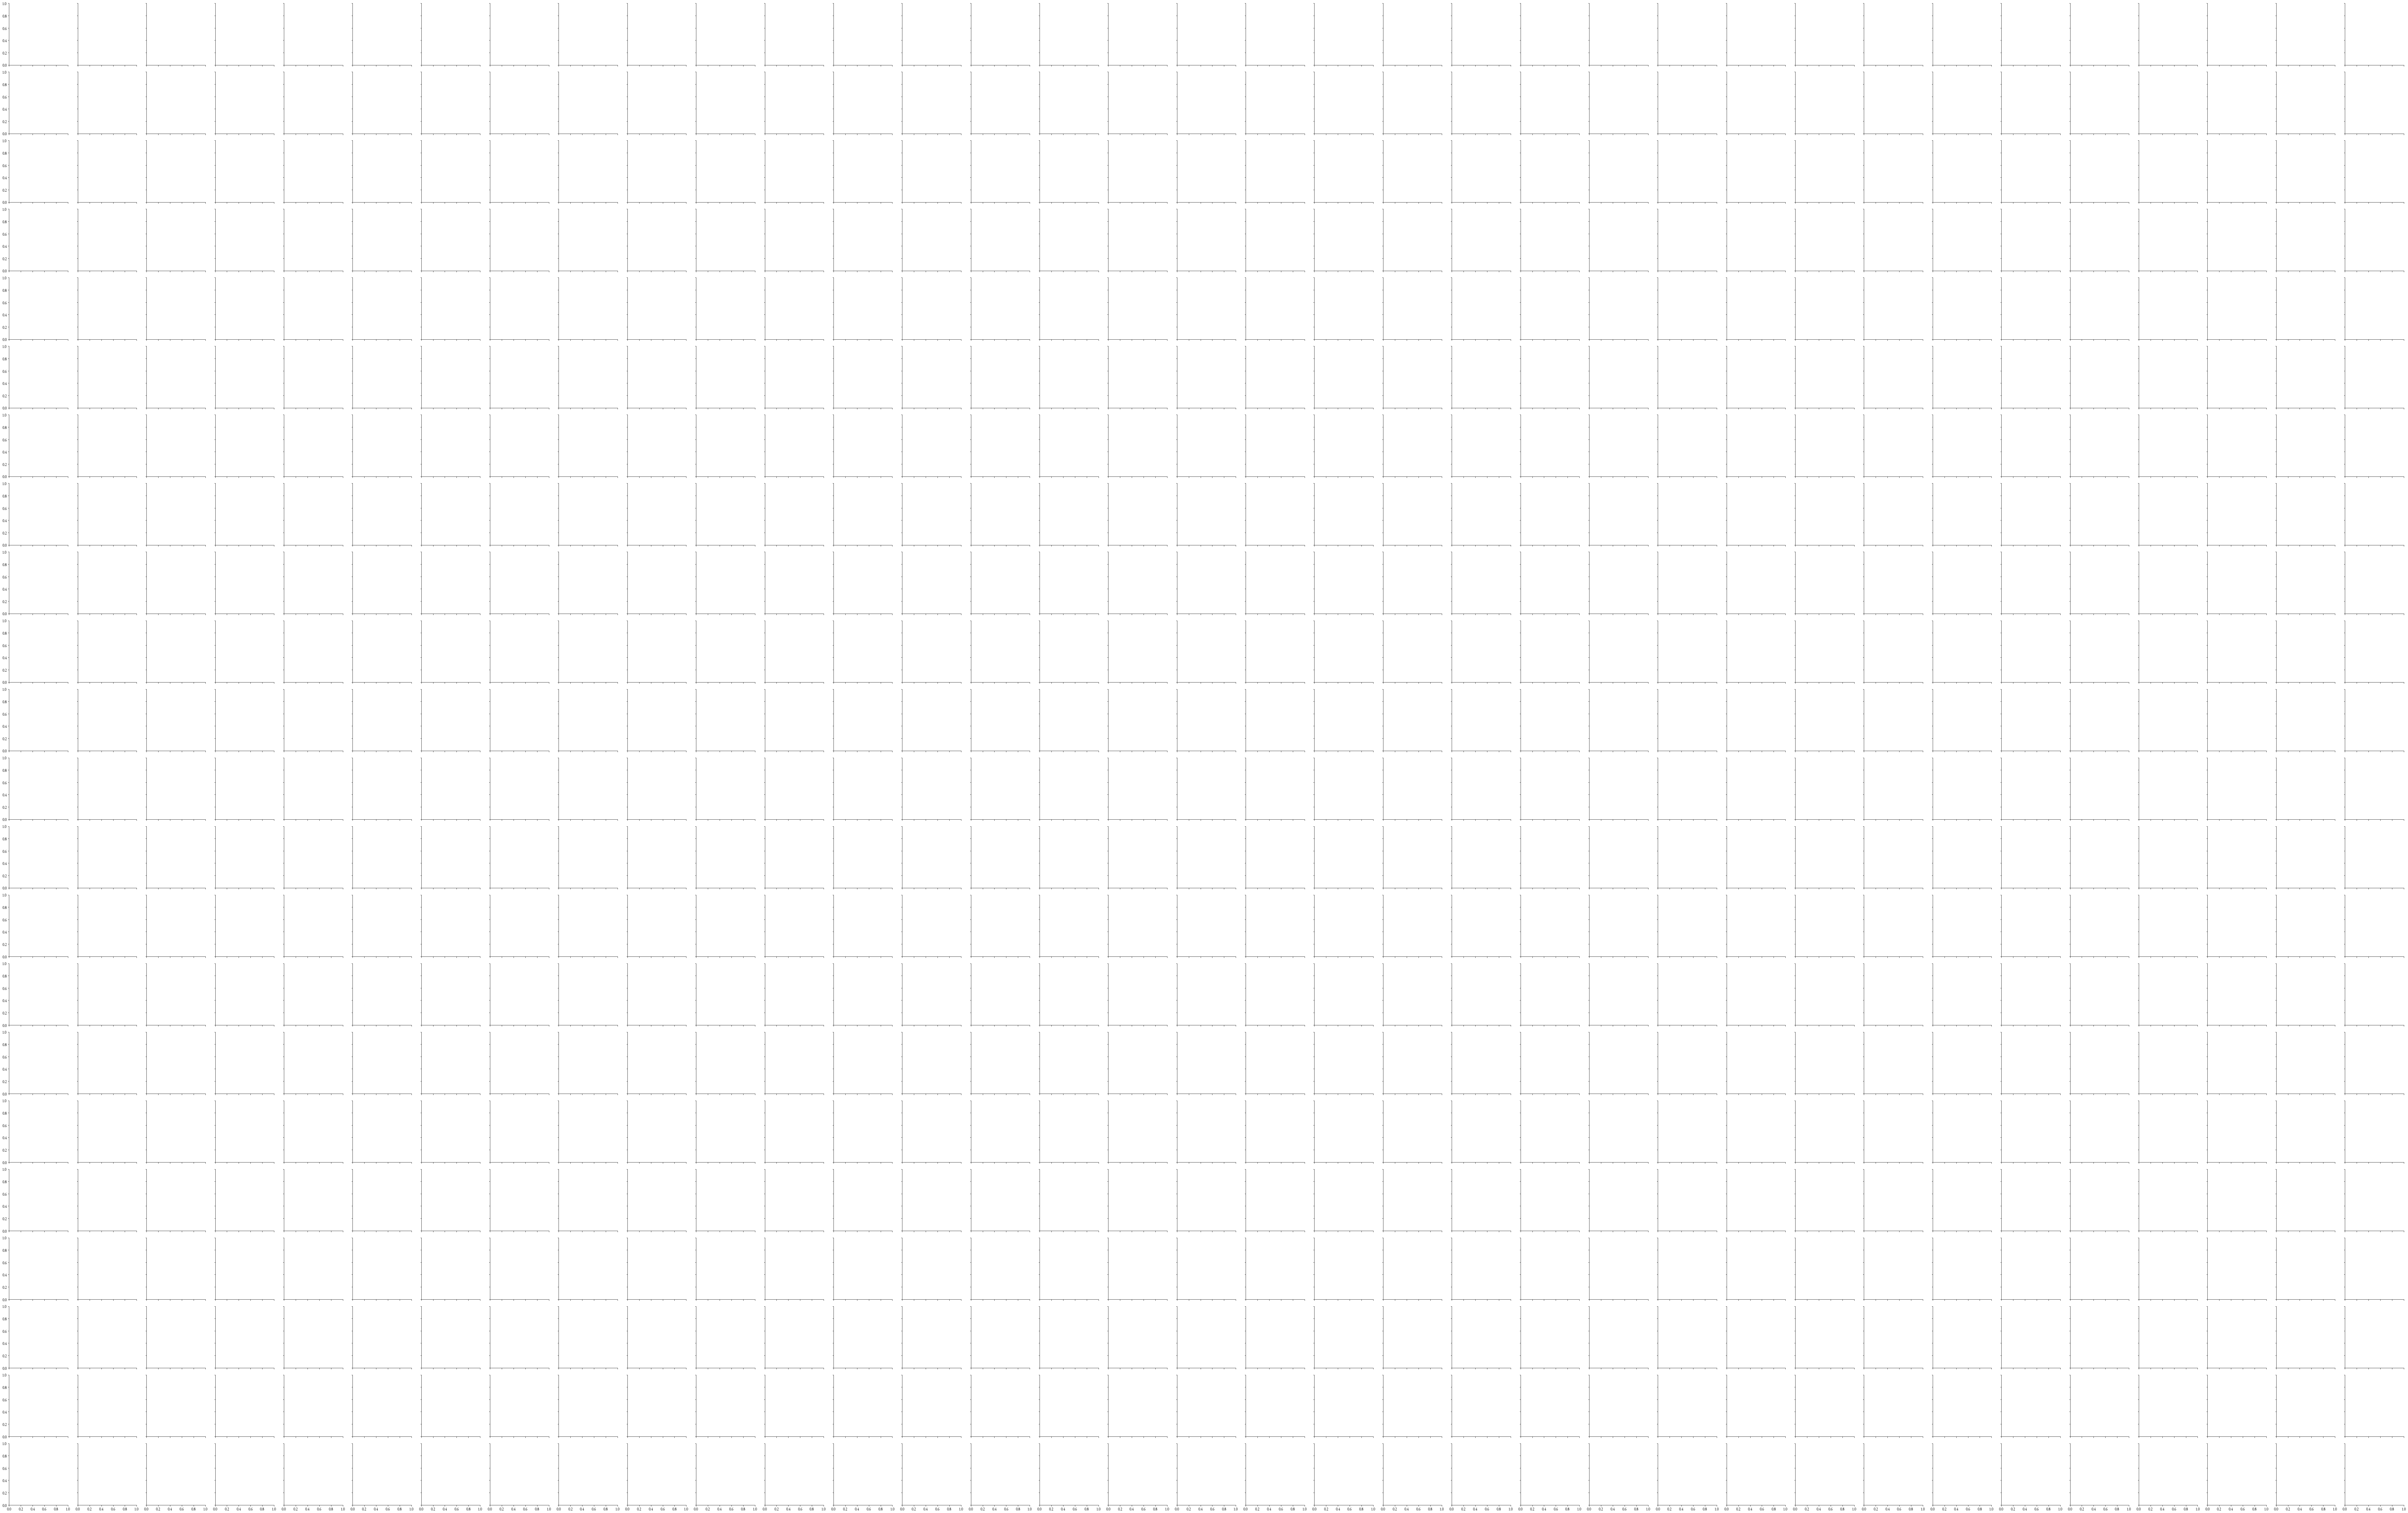

In [23]:
sns.FacetGrid(data,col='sepal_length',row='petal_width',hue='species')

In [48]:
data.corr() # correlation 상관관계 분석 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


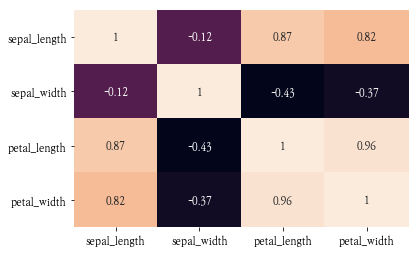

In [37]:
# heatmap <- corr 한 것을 넣는다. 
sns.heatmap(data.corr(),annot=True,cbar=False)

In [38]:
# 1이거나 1에 가까울 수록 관련성이 있어서 분석하기 용이하다. 
# 다중 공선성 -> column끼리의 관련성이 있을 수 있다. 
# 이로 인해 예측이 잘 안 될 수 있다. 

In [40]:
data.cov() # 공분산 => 다중공선성의 문제로 인해 공분산을 통해 분석한다. 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [41]:
# 8총사 (info, ) supervised -> (regression, classification), unspervised

In [42]:
# target이 연속적인 데이터가 아니므로 classification 을 쓴다. 

In [145]:
knc = KNeighborsClassifier()

In [62]:
data.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [63]:
data.iloc[:,-1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [74]:
x = knc.fit(data.iloc[:,:-1],data.iloc[:,-1])

In [75]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [76]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [68]:
data.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [69]:
data[data.columns[:-1]] # fancy indexing data['aaa'] => aaa 열 전체 추출 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [71]:
data.columns[-1]

'species'

In [72]:
data[data.columns[-1]]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [77]:
y = knc.fit(data[data.columns[:-1]],data[data.columns[-1]])

In [ ]:
# 문자 넣어도 예측이 된다. 
# 각 파라메터가 3일 때 어떻게 되는가? 
# ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [78]:
knc.predict([[3,3,3,3]]) 

array(['versicolor'], dtype=object)

In [79]:
knc.predict([[3,3,3,3],[3,3,1,3]])

array(['versicolor', 'setosa'], dtype=object)

In [80]:
knc.predict([[3,3,3,3],[3,3,1,3],[2,2,2,2]])

array(['versicolor', 'setosa', 'setosa'], dtype=object)

In [81]:
# supervised learning은 예측하는 것이다. 

In [82]:
# 기계학습은 일반적으로 사용할 수 있게 해야 한다.
# 한 번도 학습하지 않은 데이터에 대해 가능한 정확하게 예측할 수 있게 만들어야 한다. 

In [83]:
# 일반화 -> 아직까지 학습 안한 데이터에 대해 가능한 정확하게 예측하게 만드는 것 

In [84]:
# 정확도를 알아야 하는데 알려면 현재 데이터는 정답 데이터라고 가정해야 한다. iris에도 150개 중 3개가 엉터리 데이터가 있다. 

In [85]:
# 일단 분리시킨다. 학습시킬 것과 테스트할 것을 분리시킴 training_test_split 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data[data.columns[-1]]) 

In [4]:
X_train # random 하게 추출된 행을 기준으로 뽑은 데이터 -> 75% training set => hold out 방식 
# 아래의 결과가 동일하게 나올 수 있도록 2줄의 코드를 추가한다.
# np.random.seed(1) # 순서를 정해놓는다. 
# np.random.randint(10) # 재연가능성을 정해놓는다. kernel 다시 껐다 켜도 똑같이 나온다. 

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
103,6.3,2.9,5.6,1.8
58,6.6,2.9,4.6,1.3
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2


In [142]:
X_test # 30% test set

,sepal_length,sepal_width,petal_length,petal_width
57,4.9,2.4,3.3,1.0
145,6.7,3.0,5.2,2.3
59,5.2,2.7,3.9,1.4
0,5.1,3.5,1.4,0.2
83,6.0,2.7,5.1,1.6
103,6.3,2.9,5.6,1.8
69,5.6,2.5,3.9,1.1
19,5.1,3.8,1.5,0.3
123,6.3,2.7,4.9,1.8
142,5.8,2.7,5.1,1.9


In [97]:
y_train # 70%

61     versicolor
7          setosa
60     versicolor
129     virginica
75     versicolor
8          setosa
10         setosa
121     virginica
116     virginica
71     versicolor
139     virginica
96     versicolor
86     versicolor
21         setosa
11         setosa
98     versicolor
36         setosa
34         setosa
95     versicolor
69     versicolor
122     virginica
145     virginica
40         setosa
100     virginica
115     virginica
66     versicolor
93     versicolor
127     virginica
90     versicolor
99     versicolor
          ...    
103     virginica
84     versicolor
4          setosa
111     virginica
135     virginica
79     versicolor
132     virginica
113     virginica
42         setosa
134     virginica
5          setosa
143     virginica
12         setosa
30         setosa
78     versicolor
131     virginica
109     virginica
22         setosa
50     versicolor
102     virginica
57     versicolor
6          setosa
19         setosa
92     versicolor
114     vi

In [98]:
y_test # 30% 

58     versicolor
17         setosa
91     versicolor
118     virginica
77     versicolor
62     versicolor
72     versicolor
112     virginica
15         setosa
124     virginica
41         setosa
54     versicolor
117     virginica
45         setosa
80     versicolor
38         setosa
28         setosa
13         setosa
67     versicolor
108     virginica
1          setosa
48         setosa
46         setosa
133     virginica
51     versicolor
37         setosa
83     versicolor
32         setosa
9          setosa
26         setosa
0          setosa
65     versicolor
33         setosa
141     virginica
82     versicolor
3          setosa
106     virginica
73     versicolor
Name: species, dtype: object

In [99]:
# 성능이 어느 정도인지 확인하기 위해 원래 있던 데이터를 분리 
# 확인은 test로 한다. 답을 빼놓고 예측하게 한다. 

In [104]:
kns = KNeighborsClassifier()

In [105]:
kns.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
kns.predict(X_test)

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor'], dtype=object)

In [109]:
k = confusion_matrix(y_test,kns.predict(X_test)) # 실제 값과 예측값을 서로 비교 

In [114]:
k # (열: 실제값 -> 위에서 아래로 내려오는 값), 행: 예측값 

array([[17,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  7]])

In [108]:
# 38개 중에 35개 맞추었다. (맞춘 값: 대각선에 있는 숫자의 합 - 17 + 11 + 7)

In [110]:
# heatmap 

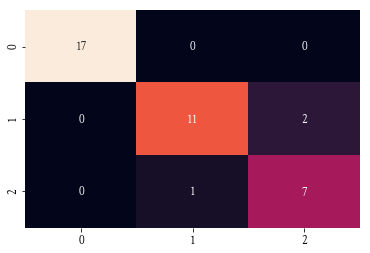

In [113]:
sns.heatmap(k,annot=True,cbar=False)

In [115]:
import inspect

In [116]:
print(inspect.getsource(confusion_matrix))

def confusion_matrix(y_true, y_pred, labels=None, sample_weight=None):
    """Compute confusion matrix to evaluate the accuracy of a classification

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.

    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.

    labels : array, shape = [n_classes], optional
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If none is g

In [117]:
# regression에는 confusion_matrix를 쓸 수 있다. regression은 모든 실수의 합을 의미하기 때문이다.
# 따라서, confusion_matrix 는 classification에만 쓸 수 있다.

In [118]:
# hold out 방식은 data가 많을때만 효과적이다. 데이터가 작으면 학습이 되지 않는 경우가 있다. 
# 학습이 된 것인지 확인해야 한다.

In [119]:
import random

In [120]:
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [123]:
random.random() # 0에서 1사이 

0.9688555374998016

In [125]:
# 확률분포 -> 항상 동일한 패턴으로 랜덤값이 나오는 게 uniform  
random.uniform(2.5,10.0)

4.144702452379266

In [126]:
random.randrange(10) 

0

In [127]:
random.randrange(0,101,2)

26

In [128]:
random.choice(['win','lose','draw'])

'lose'

In [130]:
# scikit에서 shuffle은 중복을 포함함 
deck = 'ace two three four'.split()
random.shuffle(deck)
deck

['three', 'two', 'ace', 'four']

In [131]:
# sample 은 전체 중에 일부만 뽑는 것이다.
random.sample([10, 20, 30, 40, 50], k=4)

[40, 10, 50, 30]

In [132]:
dir(np.random)

['Lock',
 'RandomState',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'np',
 'operator',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'test',
 'triangular',
 'uniform',
 'vonmises',
 'wald',
 'warnings',
 'weibull',
 'zipf']

In [133]:
# NumPy 기반으로 만든 함수를 묶어놓은 것 -> SciPy 